In [1]:
# Importing libraies

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

In [343]:
train_df=pd.read_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\dataset\train.csv',header=0,index_col=0)
train_df.shape

(15150, 15)

In [344]:
test_df=pd.read_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\dataset\test.csv',header=0,index_col=0)
test_df.shape

(1850, 14)

# Understanding the Training data

In [208]:
train_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
CustomerID,,,,,,,,,,,,,,,
CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI


In [209]:
train_df.describe(include='all')

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
count,14147.000000,15150,15150,15150,14377.000000,15150,15150,15150.000000,15150.000000,15150.000000,14215.000000,14302.000000,15150.000000,15150.000000,15150
unique,NaN,3,23,21,NaN,1455,670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,Mumbai,California,NaN,2017-06-23,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New_UI
freq,NaN,6608,1131,1975,NaN,416,449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7674
mean,28.356613,NaN,NaN,NaN,8.200876,NaN,NaN,0.323828,1.848024,4.464372,4.573373,4.576805,4.069482,2.830962,NaN
std,7.563249,NaN,NaN,NaN,3.606418,NaN,NaN,0.467951,12.814344,2.979838,2.628990,2.380538,3.808290,13.056017,NaN
min,15.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-99.000000,-1.000000,-3.000000,-2.000000,-20.114294,-99.000000,NaN
25%,22.000000,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000,1.301135,2.019508,2.602179,2.817589,1.135181,2.472861,NaN
50%,29.000000,NaN,NaN,NaN,8.000000,NaN,NaN,0.000000,3.305220,3.603376,4.826021,4.338659,2.914518,4.602270,NaN
75%,33.000000,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000,6.656113,7.595931,6.482865,6.532475,7.634503,7.872561,NaN


# Preprocessing 

In [345]:
train_df=train_df.replace('Not_Specified',np.nan)


In [346]:
print(train_df.Gender.value_counts())

Male      6608
Female    6328
Name: Gender, dtype: int64


In [347]:
train_df.dtypes

Age                       float64
Gender                     object
City                       object
State                      object
No_of_orders_placed       float64
Sign_up_date               object
Last_order_placed_date     object
is_premium_member           int64
Women’s_Clothing          float64
Men’s_Clothing            float64
Kid’s_Clothing            float64
Home_&_Living             float64
Beauty                    float64
Electronics               float64
Preferred_Theme            object
dtype: object

In [349]:
train_df=train_df.replace('?',np.nan)

In [ ]:
# Removing the columns  Last_order_placed_date & Sign_up_date

In [350]:
train=train_df[['Age', 'Gender', 'City', 'State', 'No_of_orders_placed','is_premium_member', 'Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty','Electronics','Preferred_Theme']]

In [351]:
train.dtypes

Age                    float64
Gender                  object
City                    object
State                   object
No_of_orders_placed    float64
is_premium_member        int64
Women’s_Clothing       float64
Men’s_Clothing         float64
Kid’s_Clothing         float64
Home_&_Living          float64
Beauty                 float64
Electronics            float64
Preferred_Theme         object
dtype: object

# Handling missing values in Training data

In [352]:
train.isnull().sum()

Age                    1003
Gender                 2214
City                    446
State                     0
No_of_orders_placed     773
is_premium_member         0
Women’s_Clothing          0
Men’s_Clothing            0
Kid’s_Clothing          935
Home_&_Living           848
Beauty                    0
Electronics               0
Preferred_Theme           0
dtype: int64

In [353]:
num_col=['Age','No_of_orders_placed','Kid’s_Clothing','Home_&_Living']
char_col=['Gender','City']

In [354]:
for i in num_col:
    train[i].fillna(train[i].mean(),inplace=True)

In [355]:
for i in char_col:
    train[i].fillna(train[i].mode()[0],inplace=True)

In [224]:
train.isnull().sum()

Age                    0
Gender                 0
City                   0
State                  0
No_of_orders_placed    0
is_premium_member      0
Women’s_Clothing       0
Men’s_Clothing         0
Kid’s_Clothing         0
Home_&_Living          0
Beauty                 0
Electronics            0
Preferred_Theme        0
dtype: int64

In [ ]:
#Data Visualization

In [356]:
import seaborn as sns

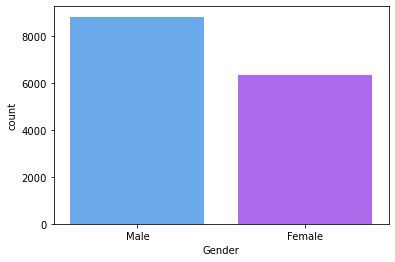

In [360]:
sns.countplot(x='Gender',data=train,palette='cool')
plt.show()

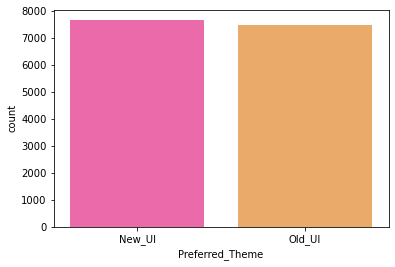

In [362]:
sns.countplot(x='Preferred_Theme',data=train,palette='spring')
plt.show()

In [ ]:
# data is not biased

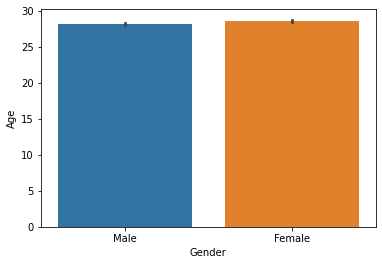

In [365]:
sns.barplot(x="Gender",y="Age",data=train)
plt.show()

# Converting Categorical data into numerical data

In [225]:
train.Preferred_Theme.value_counts()

New_UI    7674
Old_UI    7476
Name: Preferred_Theme, dtype: int64

In [226]:
train['Preferred_Theme']=train['Preferred_Theme'].map({'Old_UI':0,'New_UI':1})
print(train.Preferred_Theme.value_counts())

1    7674
0    7476
Name: Preferred_Theme, dtype: int64


In [227]:
train.columns

Index(['Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'is_premium_member', 'Women’s_Clothing', 'Men’s_Clothing',
       'Kid’s_Clothing', 'Home_&_Living', 'Beauty', 'Electronics',
       'Preferred_Theme'],
      dtype='object')

In [228]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [229]:

col=['Gender','City','State']
for i in col:
    train[i]=le.fit_transform(train[i])
print(train.head())
    

                   Age  Gender  City  State  No_of_orders_placed  \
CustomerID                                                         
CusID_00126  22.000000       1    20      2             4.000000   
CusID_00927  28.356613       0     2      5             9.000000   
CusID_01646  26.000000       1    10      8             8.200876   
CusID_06228  28.356613       1    15      3             7.000000   
CusID_04239  29.000000       0    18     14             8.200876   

             is_premium_member  Women’s_Clothing  Men’s_Clothing  \
CustomerID                                                         
CusID_00126                  0          2.945701        8.924431   
CusID_00927                  0          6.115229        2.363926   
CusID_01646                  0          1.000000        3.000000   
CusID_06228                  0          2.116475        9.064060   
CusID_04239                  0          7.352878        1.995744   

             Kid’s_Clothing  Home_&_Living    

In [230]:
train.Age=train.Age.astype(int)


In [231]:
train.dtypes

Age                      int32
Gender                   int32
City                     int32
State                    int32
No_of_orders_placed    float64
is_premium_member        int64
Women’s_Clothing       float64
Men’s_Clothing         float64
Kid’s_Clothing         float64
Home_&_Living          float64
Beauty                 float64
Electronics            float64
Preferred_Theme          int64
dtype: object

# Handling the Test data

In [233]:
test_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
CustomerID,,,,,,,,,,,,,,
CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478
CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664
CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313
CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196
CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316


In [234]:
test_df.describe(include='all')

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
count,1819.000000,1850,1850,1850,1778.000000,1850,1850,1850.000000,1850.000000,1850.000000,1827.000000,1827.000000,1850.000000,1850.000000
unique,NaN,3,23,21,NaN,1037,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,Sydney,California,NaN,?,2021-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,798,97,173,NaN,22,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,29.272128,NaN,NaN,NaN,8.242407,NaN,NaN,0.340541,4.384352,4.315254,4.945404,4.505756,4.174118,4.877670
std,8.187110,NaN,NaN,NaN,3.657581,NaN,NaN,0.474019,2.886372,2.948271,2.582262,2.643967,3.273865,2.904890
min,15.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,-2.000000,-1.000000,-2.000000,-1.000000,-1.000000,-2.000000
25%,23.000000,NaN,NaN,NaN,5.000000,NaN,NaN,0.000000,2.000000,2.000000,3.000000,2.276267,1.363882,2.348540
50%,29.000000,NaN,NaN,NaN,8.000000,NaN,NaN,0.000000,3.739130,3.646886,5.073131,4.313613,3.000000,4.632417
75%,34.000000,NaN,NaN,NaN,11.000000,NaN,NaN,1.000000,6.958571,6.929417,6.920714,6.631530,7.690696,7.533786


In [235]:
test_df=test_df.replace('Not_Specified',np.nan)


In [236]:
test_df=test_df.replace('?',np.nan)

In [237]:
test_df.Gender.value_counts()

Male      798
Female    762
Name: Gender, dtype: int64

In [238]:
test=test_df[['Age', 'Gender', 'City', 'State', 'No_of_orders_placed','is_premium_member', 'Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty','Electronics']]

In [239]:
test.dtypes

Age                    float64
Gender                  object
City                    object
State                   object
No_of_orders_placed    float64
is_premium_member        int64
Women’s_Clothing       float64
Men’s_Clothing         float64
Kid’s_Clothing         float64
Home_&_Living          float64
Beauty                 float64
Electronics            float64
dtype: object

# Handling missing values in test data

In [240]:
test.isnull().sum()

Age                     31
Gender                 290
City                    43
State                    0
No_of_orders_placed     72
is_premium_member        0
Women’s_Clothing         0
Men’s_Clothing           0
Kid’s_Clothing          23
Home_&_Living           23
Beauty                   0
Electronics              0
dtype: int64

In [241]:
num_col=['Age','No_of_orders_placed','Kid’s_Clothing','Home_&_Living']
char_col=['Gender','City']

In [242]:
for i in num_col:
    test[i].fillna(test[i].mean(),inplace=True)

In [243]:
for i in char_col:
    test[i].fillna(test[i].mode()[0],inplace=True)

In [244]:
test.isnull().sum()

Age                    0
Gender                 0
City                   0
State                  0
No_of_orders_placed    0
is_premium_member      0
Women’s_Clothing       0
Men’s_Clothing         0
Kid’s_Clothing         0
Home_&_Living          0
Beauty                 0
Electronics            0
dtype: int64

# Converting categorical values to numerical in Test data


In [245]:
test.columns

Index(['Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'is_premium_member', 'Women’s_Clothing', 'Men’s_Clothing',
       'Kid’s_Clothing', 'Home_&_Living', 'Beauty', 'Electronics'],
      dtype='object')

In [246]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [247]:
col=['Gender','City','State']
for i in col:
    test[i]=le.fit_transform(test[i])
print(test.head())
    

              Age  Gender  City  State  No_of_orders_placed  \
CustomerID                                                    
CusID_09654  20.0       0    20      2                  5.0   
CusID_09727  25.0       1     2      5                 11.0   
CusID_07391  31.0       0    14     20                  1.0   
CusID_08577  17.0       0     6     19                  7.0   
CusID_08122  39.0       1    12     11                  8.0   

             is_premium_member  Women’s_Clothing  Men’s_Clothing  \
CustomerID                                                         
CusID_09654                  0          4.000000        3.043023   
CusID_09727                  1          4.379066        5.819171   
CusID_07391                  1          7.946141        4.000000   
CusID_08577                  0          8.396490        3.636100   
CusID_08122                  0          2.443467        9.143171   

             Kid’s_Clothing  Home_&_Living    Beauty  Electronics  
CustomerID   

In [248]:
test.Age=test.Age.astype(int)

In [249]:
test.dtypes

Age                      int32
Gender                   int32
City                     int32
State                    int32
No_of_orders_placed    float64
is_premium_member        int64
Women’s_Clothing       float64
Men’s_Clothing         float64
Kid’s_Clothing         float64
Home_&_Living          float64
Beauty                 float64
Electronics            float64
dtype: object

# Converting Training and Testing data -X & Y

In [253]:
X_train=train.values[:,0:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
                     

In [254]:
print(X_train.shape)
print(Y_train.shape)

(15150, 12)
(15150,)


In [255]:
X_test=test.values[:,:]

In [256]:
print(X_test.shape)

(1850, 12)


# Scaling the data

In [257]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

In [259]:
test_df["Preferred_Theme"]=Y_pred
test_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
CustomerID,,,,,,,,,,,,,,,
CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478,1
CusID_09727,25.0,NaN,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664,0
CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313,0
CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196,0
CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316,1


In [261]:
submit_df=test_df[['Preferred_Theme']]

In [262]:
submit_df.Preferred_Theme=test_df.Preferred_Theme.map({0:'Old_UI',1:'New_UI'})

In [263]:
submit_df.to_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\Submission\Logistic_reg_1.csv')

# SGD Classifier

In [280]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(loss='log',penalty='l2',max_iter=1000,alpha=0.01)
clf.fit(X_train,Y_train)
Y_Pred=clf.predict(X_test)

In [281]:
test_df["Preferred_Theme"]=Y_Pred
test_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
CustomerID,,,,,,,,,,,,,,,
CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478,1
CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664,0
CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313,0
CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196,0
CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316,1


In [282]:
submit_df=test_df[['Preferred_Theme']]
submit_df.Preferred_Theme=test_df.Preferred_Theme.map({0:'Old_UI',1:'New_UI'})
submit_df.to_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\Submission\sgd_3.csv')

# Randomn Forest

In [297]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=200,random_state=10,max_depth=10)
RF.fit(X_train,Y_train)
Y_Pred=RF.predict(X_test)

In [298]:
test_df["Preferred_Theme"]=Y_Pred
test_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
CustomerID,,,,,,,,,,,,,,,
CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478,1
CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664,0
CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313,0
CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196,1
CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316,1


In [300]:
submit_df=test_df[['Preferred_Theme']]
submit_df.Preferred_Theme=test_df.Preferred_Theme.map({0:'Old_UI',1:'New_UI'})
submit_df.to_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\Submission\RF_5.csv')

# XG Boosting

In [334]:
from xgboost import XGBClassifier
xg=XGBClassifier(max_depth=10,subsample=0.5,n_estimators=200,learning_rate=0.01)
xg.fit(X_train,Y_train)
Y_Pred=xg.predict(X_test)

[16:39:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [335]:
test_df["Preferred_Theme"]=Y_Pred
test_df.head()

,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
CustomerID,,,,,,,,,,,,,,,
CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478,1
CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664,0
CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313,0
CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196,1
CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316,0


In [336]:
submit_df=test_df[['Preferred_Theme']]
submit_df.Preferred_Theme=test_df.Preferred_Theme.map({0:'Old_UI',1:'New_UI'})
submit_df.to_csv(r'C:\Users\Lenovo\Desktop\hackathons-hackereath\Submission\XGB_3.csv')